In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

In [3]:
os.getcwd()

#os.chdir('Data')


'C:\\Users\\Joe\\Documents\\GitHub\\gitHub-Projects\\Big Data Mart'

In [4]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding = "ISO-8859-1", engine = 'python')

In [5]:
pd.options.display.max_columns = None
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [6]:
column_list = df.dtypes

print(column_list)

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

CHECK FOR UNIQUENESS OF EACH COLUMN

In [8]:
uniq = df.nunique()

In [9]:
percent_unique = uniq/len(df.index)
print(percent_unique * 100)

Type                               0.002216
Days for shipping (real)           0.003878
Days for shipment (scheduled)      0.002216
Benefit per order                 12.185975
Sales per customer                 1.621436
Delivery Status                    0.002216
Late_delivery_risk                 0.001108
Category Id                        0.028252
Category Name                      0.027698
Customer City                      0.311879
Customer Country                   0.001108
Customer Email                     0.000554
Customer Fname                     0.433195
Customer Id                       11.440347
Customer Lname                     0.614340
Customer Password                  0.000554
Customer Segment                   0.001662
Customer State                     0.025482
Customer Street                    4.131421
Customer Zipcode                   0.551189
Department Id                      0.006094
Department Name                    0.006094
Latitude                        

There are a few potential categorical fields: Product Status / Product Category ID / Product Card ID / Order Region / Market / Country / Department Name (Dept ID) / Customer Segment / Customer Country / Category ID / Delivery Status / Shipping Mode / Late Delivery risk;.

A few of these are duplicate information Such as Product Category ID = Category ID / Customer Country - Order Country /  Market - Order Region are close 

In [10]:
market = df['Market'].value_counts()
region = df['Order Region'].value_counts()
print("Markets are defined as: \n", market)
print("Order Region is defines as: \n", region)
print(uniq)

Markets are defined as: 
 LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64
Order Region is defines as: 
 Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64
Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927

In [11]:
deliveryStatus = df['Delivery Status'].value_counts()
orderStatus = df['Order Status'].value_counts()
marketStatus = df['Market'].value_counts()
print(deliveryStatus)
print(orderStatus)
print("Market status", "\n", marketStatus)
category = df['Category Name'].value_counts()
print(category)
productCategory = df['Product Category Id'].value_counts()
print(productCategory)

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64
Market status 
 LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                 

In [12]:
df.describe().loc[['min','max']].T

min            max
Days for shipping (real)          0.000000       6.000000
Days for shipment (scheduled)     0.000000       4.000000
Benefit per order             -4274.979980     911.799988
Sales per customer                7.490000    1939.989990
Late_delivery_risk                0.000000       1.000000
Category Id                       2.000000      76.000000
Customer Id                       1.000000   20757.000000
Customer Zipcode                603.000000   99205.000000
Department Id                     2.000000      12.000000
Latitude                        -33.937553      48.781933
Longitude                      -158.025986     115.263077
Order Customer Id                 1.000000   20757.000000
Order Id                          1.000000   77204.000000
Order Item Cardprod Id           19.000000    1363.000000
Order Item Discount               0.000000     500.000000
Order Item Discount Rate          0.000000       0.250000
Order Item Id                     1.000000  180519.000000
Order Item Product Price          9.990000    1999.989990
Order Item Profit Ratio          -2.750000       0.500000
Order Item Quantity               1.000000       5.000000
Sales                             9.990000    1999.989990
Order Item Total                  7.490000    1939.989990
Order Profit Per Order        -4274.979980     911.799988
Order Zipcode                  1040.000000   99301.000000
Product Card Id                  19.000000    1363.000000
Product Category Id               2.000000      76.000000
Product Description                    NaN            NaN
Product Price                     9.990000    1999.989990
Product Status                    0.000000       0.000000

Let's evaluate the market regions:

In [13]:
is_africa = df['Market']=='Africa'
df_africa = df[is_africa]
is_latam = df['Market']=='LATAM'
df_latam = df[is_latam]
is_asia = df['Market']=='Pacific Asia'
df_asia = df[is_asia]
is_usca = df['Market']=='USCA'
df_usca = df[is_usca]
is_europe = df['Market']=='Europe'
df_europe = df[is_europe]

In [14]:
df_africa.describe


<bound method NDFrame.describe of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
59       PAYMENT                         2                              2   
60       PAYMENT                         5                              2   
61       PAYMENT                         5                              2   
62       PAYMENT                         5                              2   
137        DEBIT                         6                              2   
...          ...                       ...                            ...   
179427  TRANSFER                         6                              4   
179428  TRANSFER                         4                              4   
179429  TRANSFER                         4                              4   
179430  TRANSFER                         4                              4   
179431  TRANSFER                         5                              4   

        Benefit per order  Sales per cust

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 54.59
6340
1 Percent of total Deliveries 22.77
2645
2 Percent of total Deliveries 18.68
2169
3 Percent of total Deliveries 3.96
460


Text(0.5, 1.0, 'Africa Delivery Status')

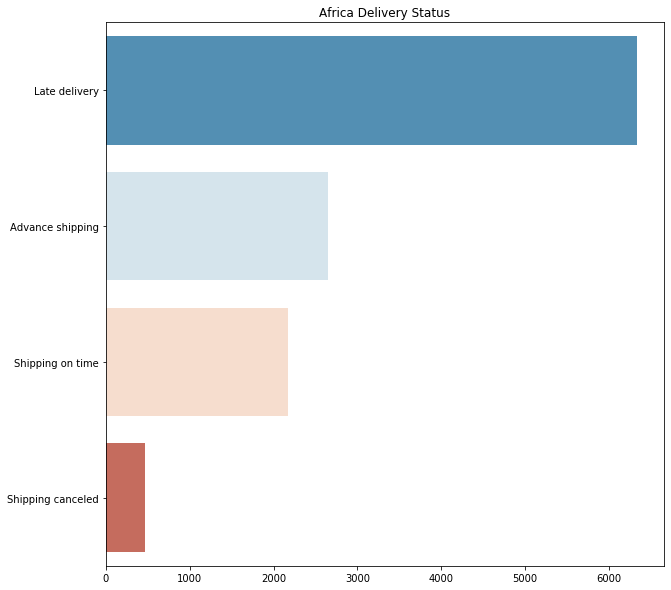

In [15]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_africa['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title("Africa Delivery Status")


0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 55.21
27743
1 Percent of total Deliveries 23.09
11604
2 Percent of total Deliveries 17.4
8743
3 Percent of total Deliveries 4.3
2162


Text(0.5, 1.0, 'Europe Delivery Status')

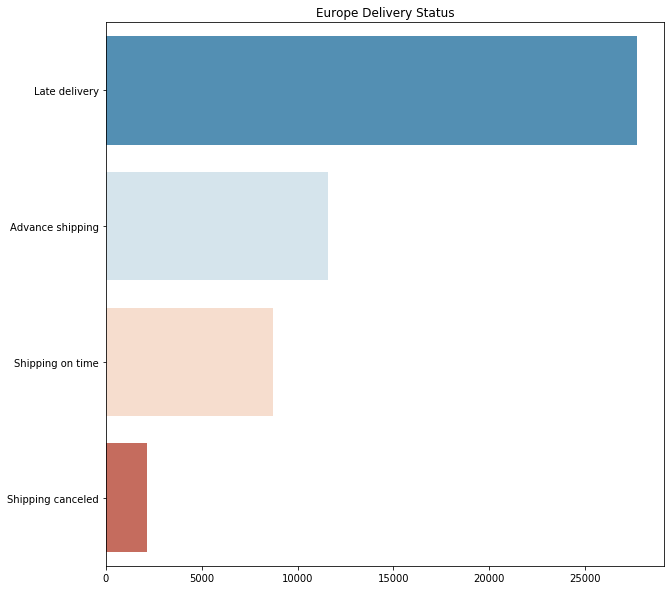

In [16]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_europe['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Europe Delivery Status')

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 54.36
28044
1 Percent of total Deliveries 23.33
12039
2 Percent of total Deliveries 17.88
9226
3 Percent of total Deliveries 4.43
2285


Text(0.5, 1.0, 'Latin America Delivery Status')

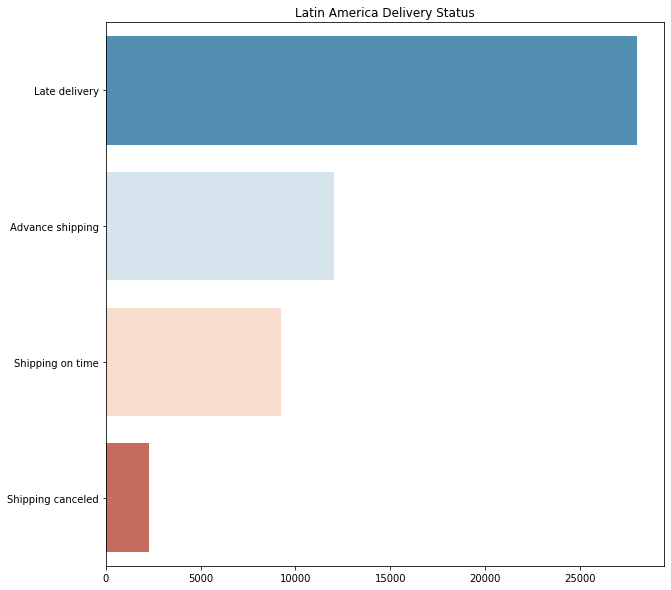

In [17]:

# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_latam['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Latin America Delivery Status')

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 55.05
22712
1 Percent of total Deliveries 22.96
9473
2 Percent of total Deliveries 17.94
7400
3 Percent of total Deliveries 4.06
1675


Text(0.5, 1.0, 'Pacific Asia Delivery Status')

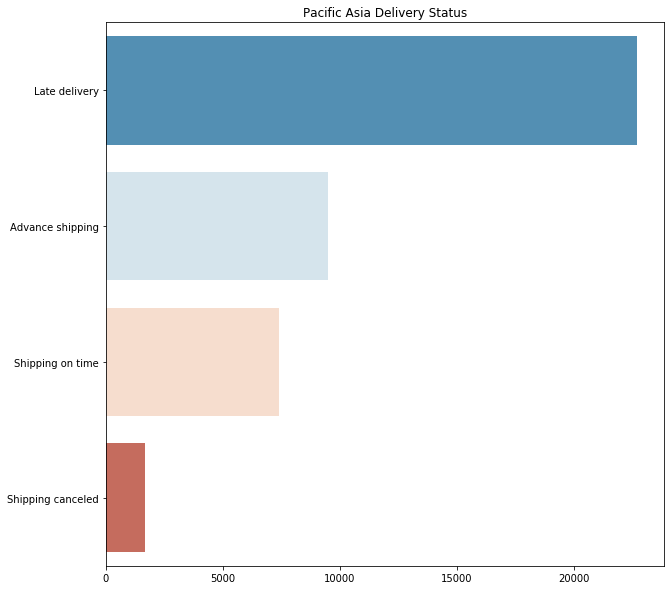

In [18]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_asia['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Pacific Asia Delivery Status')

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 54.8
14138
1 Percent of total Deliveries 22.6
5831
2 Percent of total Deliveries 18.05
4658
3 Percent of total Deliveries 4.54
1172


Text(0.5, 1.0, 'North and Central America Delivery Status')

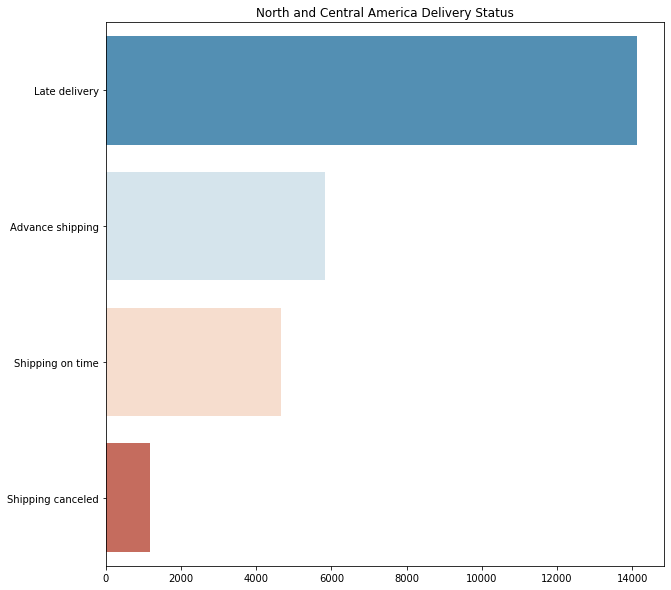

In [19]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_usca['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('North and Central America Delivery Status')

Let's evaluate at the Regional level if there are different delivery results at that level.  Let's check 3 or 4 of the most populous regions. 
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792

In [21]:
is_central = df['Order Region']=='Central America'
df_central = df[is_central]
is_weuro = df['Order Region']=='Western Europe'
df_weuro = df[is_weuro]
is_south = df['Order Region']=='South America'
df_south = df[is_south]
is_ocean = df['Order Region']=='Oceania'
df_ocean = df[is_ocean]
is_neurope = df['Order Region']=='Northern Europe'
df_neurope = df[is_neurope]

In [24]:
df_weuro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27109 entries, 63 to 179581
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           27109 non-null  object 
 1   Days for shipping (real)       27109 non-null  int64  
 2   Days for shipment (scheduled)  27109 non-null  int64  
 3   Benefit per order              27109 non-null  float64
 4   Sales per customer             27109 non-null  float64
 5   Delivery Status                27109 non-null  object 
 6   Late_delivery_risk             27109 non-null  int64  
 7   Category Id                    27109 non-null  int64  
 8   Category Name                  27109 non-null  object 
 9   Customer City                  27109 non-null  object 
 10  Customer Country               27109 non-null  object 
 11  Customer Email                 27109 non-null  object 
 12  Customer Fname                 27109 non-nul

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of Total Deliveries 54.02
5482
1 Percent of Total Deliveries 22.9
2324
2 Percent of Total Deliveries 18.99
1927
3 Percent of Total Deliveries 4.09
415


Text(0.5, 1.0, 'Oceania Delivery Status')

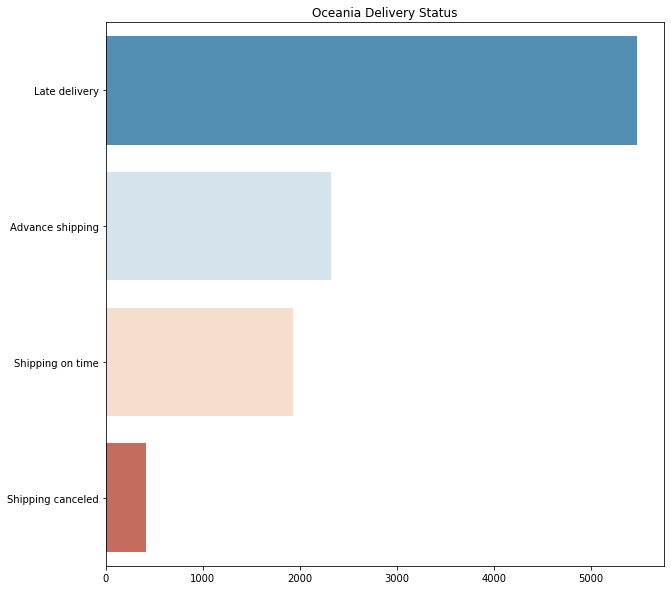

In [25]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_ocean['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of Total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Oceania Delivery Status')

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of Total Deliveries 54.75
15518
1 Percent of Total Deliveries 23.17
6566
2 Percent of Total Deliveries 17.96
5090
3 Percent of Total Deliveries 4.12
1167


Text(0.5, 1.0, 'Central America Delivery Status')

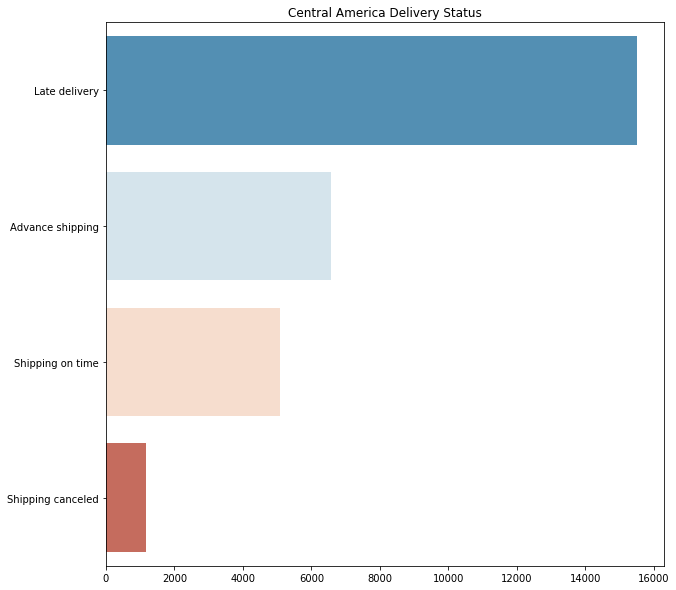

In [26]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_central['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of Total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Central America Delivery Status')

0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 55.85
15140
1 Percent of total Deliveries 22.64
6138
2 Percent of total Deliveries 16.93
4589
3 Percent of total Deliveries 4.58
1242


Text(0.5, 1.0, 'Western Europe Delivery Status')

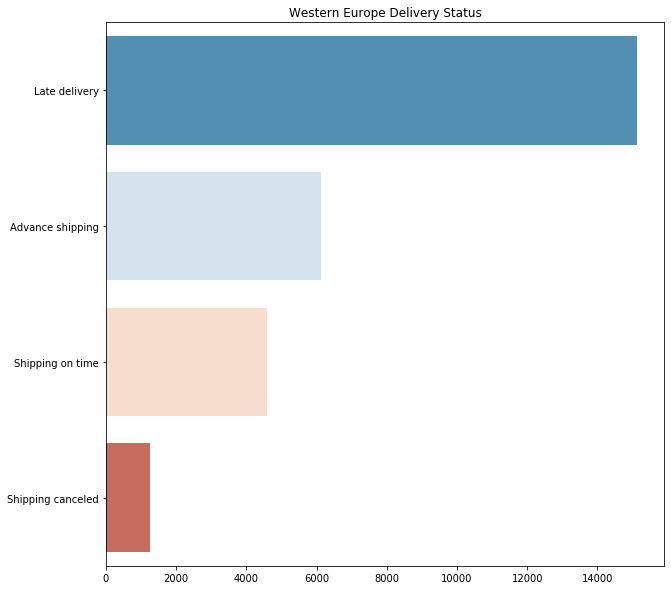

In [27]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_weuro['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Western Europe Delivery Status')

These numbers are no different than the larger markets.  Maybe a smaller segment, though that would not have that much influence on overall delivery results.


0 Late delivery
1 Advance shipping
2 Shipping on time
3 Shipping canceled
0 Percent of total Deliveries 54.04
5292
1 Percent of total Deliveries 23.91
2341
2 Percent of total Deliveries 18.13
1775
3 Percent of total Deliveries 3.92
384


Text(0.5, 1.0, 'Northern Europe Delivery Status')

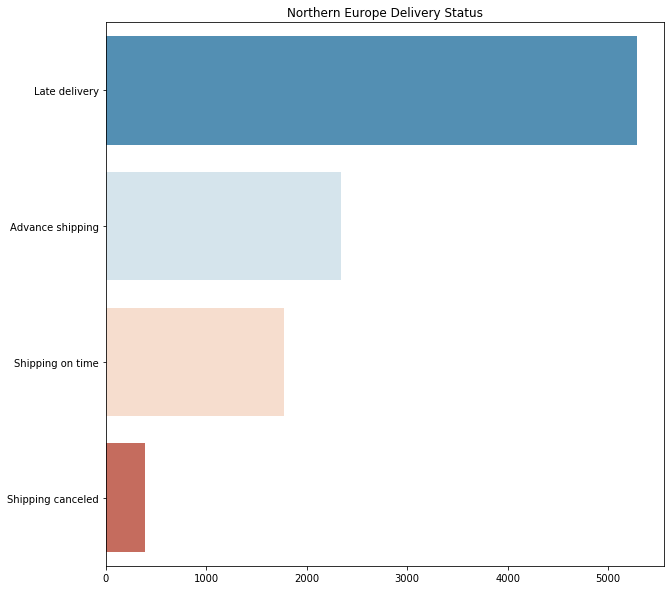

In [29]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_neurope['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Northern Europe Delivery Status')

This is not a numbers game here.  Evaluate the delivery times where nearly 50% are delivered late but only 33% are complete.  So evaluate the COMPLETE and how well those were delivered.

In [20]:
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude      Longitude  Order Customer Id       Order Id  \
count  180519.000000  180519.000000      180519.000000  180519.000000   
mean       29.719955     -84.915675        6691.379495   36221.894903   
std         9.813646      21.433241        4162.918106   21045.379569   
min       -33.937553    -158.025986           1.000000       1.000000   
25%        18.265432     -98.446312        3258.500000   18057.000000   
50%        33.144863     -76.847908        6457.000000   36140.000000   
75%        39.279617     -66.370583        9779.000000   54144.000000   
max        48.781933     115.263077       20757.000000   77204.000000   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
count           180519.000000        180519.000000             180519.000000   
mean               692.509764            20.664741                  0.101668   
std                336.446807            21.800901                  0.070415   
min                 19.000000             0.000000                  0.000000   
25%                403.000000             5.400000                  0.040000   
50%                627.000000            14.000000                  0.100000   
75%               1004.000000            29.990000                  0.160000   
max               1363.000000           500.000000                  0.250000   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
count  180519.000000             180519.000000            180519.000000   
mean    90260.000000                141.232550                 0.120647   
std     52111.490959                139.732492                 0.466796   
min         1.000000                  9.990000                -2.750000   
25%     45130.500000                 50.000000                 0.080000   
50%     90260.000000                 59.990002                 0.270000   
75%    135389.500000                199.990005                 0.360000   
max    180519.000000               1999.989990                 0.500000   

       Order Item Quantity          Sales  Order Item Total  \
count        180519.000000  1805

Check for Duplicated Rows - 

In [21]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [Type, Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer, Delivery Status, Late_delivery_risk, Category Id, Category Name, Customer City, Customer Country, Customer Email, Customer Fname, Customer Id, Customer Lname, Customer Password, Customer Segment, Customer State, Customer Street, Customer Zipcode, Department Id, Department Name, Latitude, Longitude, Market, Order City, Order Country, Order Customer Id, order date (DateOrders), Order Id, Order Item Cardprod Id, Order Item Discount, Order Item Discount Rate, Order Item Id, Order Item Product Price, Order Item Profit Ratio, Order Item Quantity, Sales, Order Item Total, Order Profit Per Order, Order Region, Order State, Order Status, Order Zipcode, Product Card Id, Product Category Id, Product Description, Product Image, Product Name, Product Price, Product Status, shipping date (DateOrders), Shipping Mode]
Index: []

Check for Null Values

In [22]:
df.isnull().values.any()

True

A quick scan found that Product Description has no data in any observation - DELETE IT

In [23]:
df.drop(['Product Description'], axis = 1)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
0               91.250000          314.640015  Advance shipping   
1             -249.089996          311.359985     Late delivery   
2             -247.779999          309.720001  Shipping on time   
3               22.860001          304.809998  Advance shipping   
4              134.210007          298.250000  Advance shipping   
...                   ...                 ...               ...   
180514          40.000000          399.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180516         141.110001          391.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id   Category Name Customer City  \
0                        0           73  Sporting Goods        Caguas   
1                        1           73  Sporting Goods        Caguas   
2                        0           73  Sporting Goods      San Jose   
3                        0           73  Sporting Goods   Los Angeles   
4                        0           73  Sporting Goods        Caguas   
...                    ...          ...             ...           ...   
180514                   0           45         Fishing      Brooklyn   
180515                   1           45         Fishing   Bakersfield   
180516                   1           45         Fishing       Bristol   
180517                   0           45         Fishing        Caguas   
180518                   0           45         Fishing        Caguas   

       Customer Country Customer Email Customer Fname  Customer Id  \
0           Puerto Rico      XXXXXXXXX          Cally        20755   
1           Puerto Rico      XXXXXXXXX          Irene        19492   
2               EE. UU.      XXXXXXXXX        Gillian        19491   
3               EE. UU.      XXXXXXXXX           Tana        19490   
4           Puerto Rico      XXXXXXXXX           Orli        19489   
...                 ...            ...            ...          ...   
180514          EE. UU.      XXXXXXXXX          Maria         1005   
180515          EE. UU.      XXXXXXXXX         Ronald         9141   
180516          EE. UU.      XXXXXXXXX           John          291   
180517      Puerto Rico      XXXXXXXXX           Mary         2813   
180518      Puerto Rico      XXXXXXXXX         Andrea         7547   

       Customer Lname Customer Password Customer Segment Customer State  \
0            Holloway         XXXXXXXXX         Consumer             PR   
1                Luna         XXXXXXXXX         Consumer             PR   
2           Maldonado         XXXXXXXXX         Consumer             CA   
3                Tate         XXXXXXXXX      Home Office             CA   
4           Hendricks         XXXXXXXXX        Corporate             PR   
...               ...               ...              ...            ...   
180514       Peterson         XXXXXXXXX

## Evaluate column relationships with pairplot

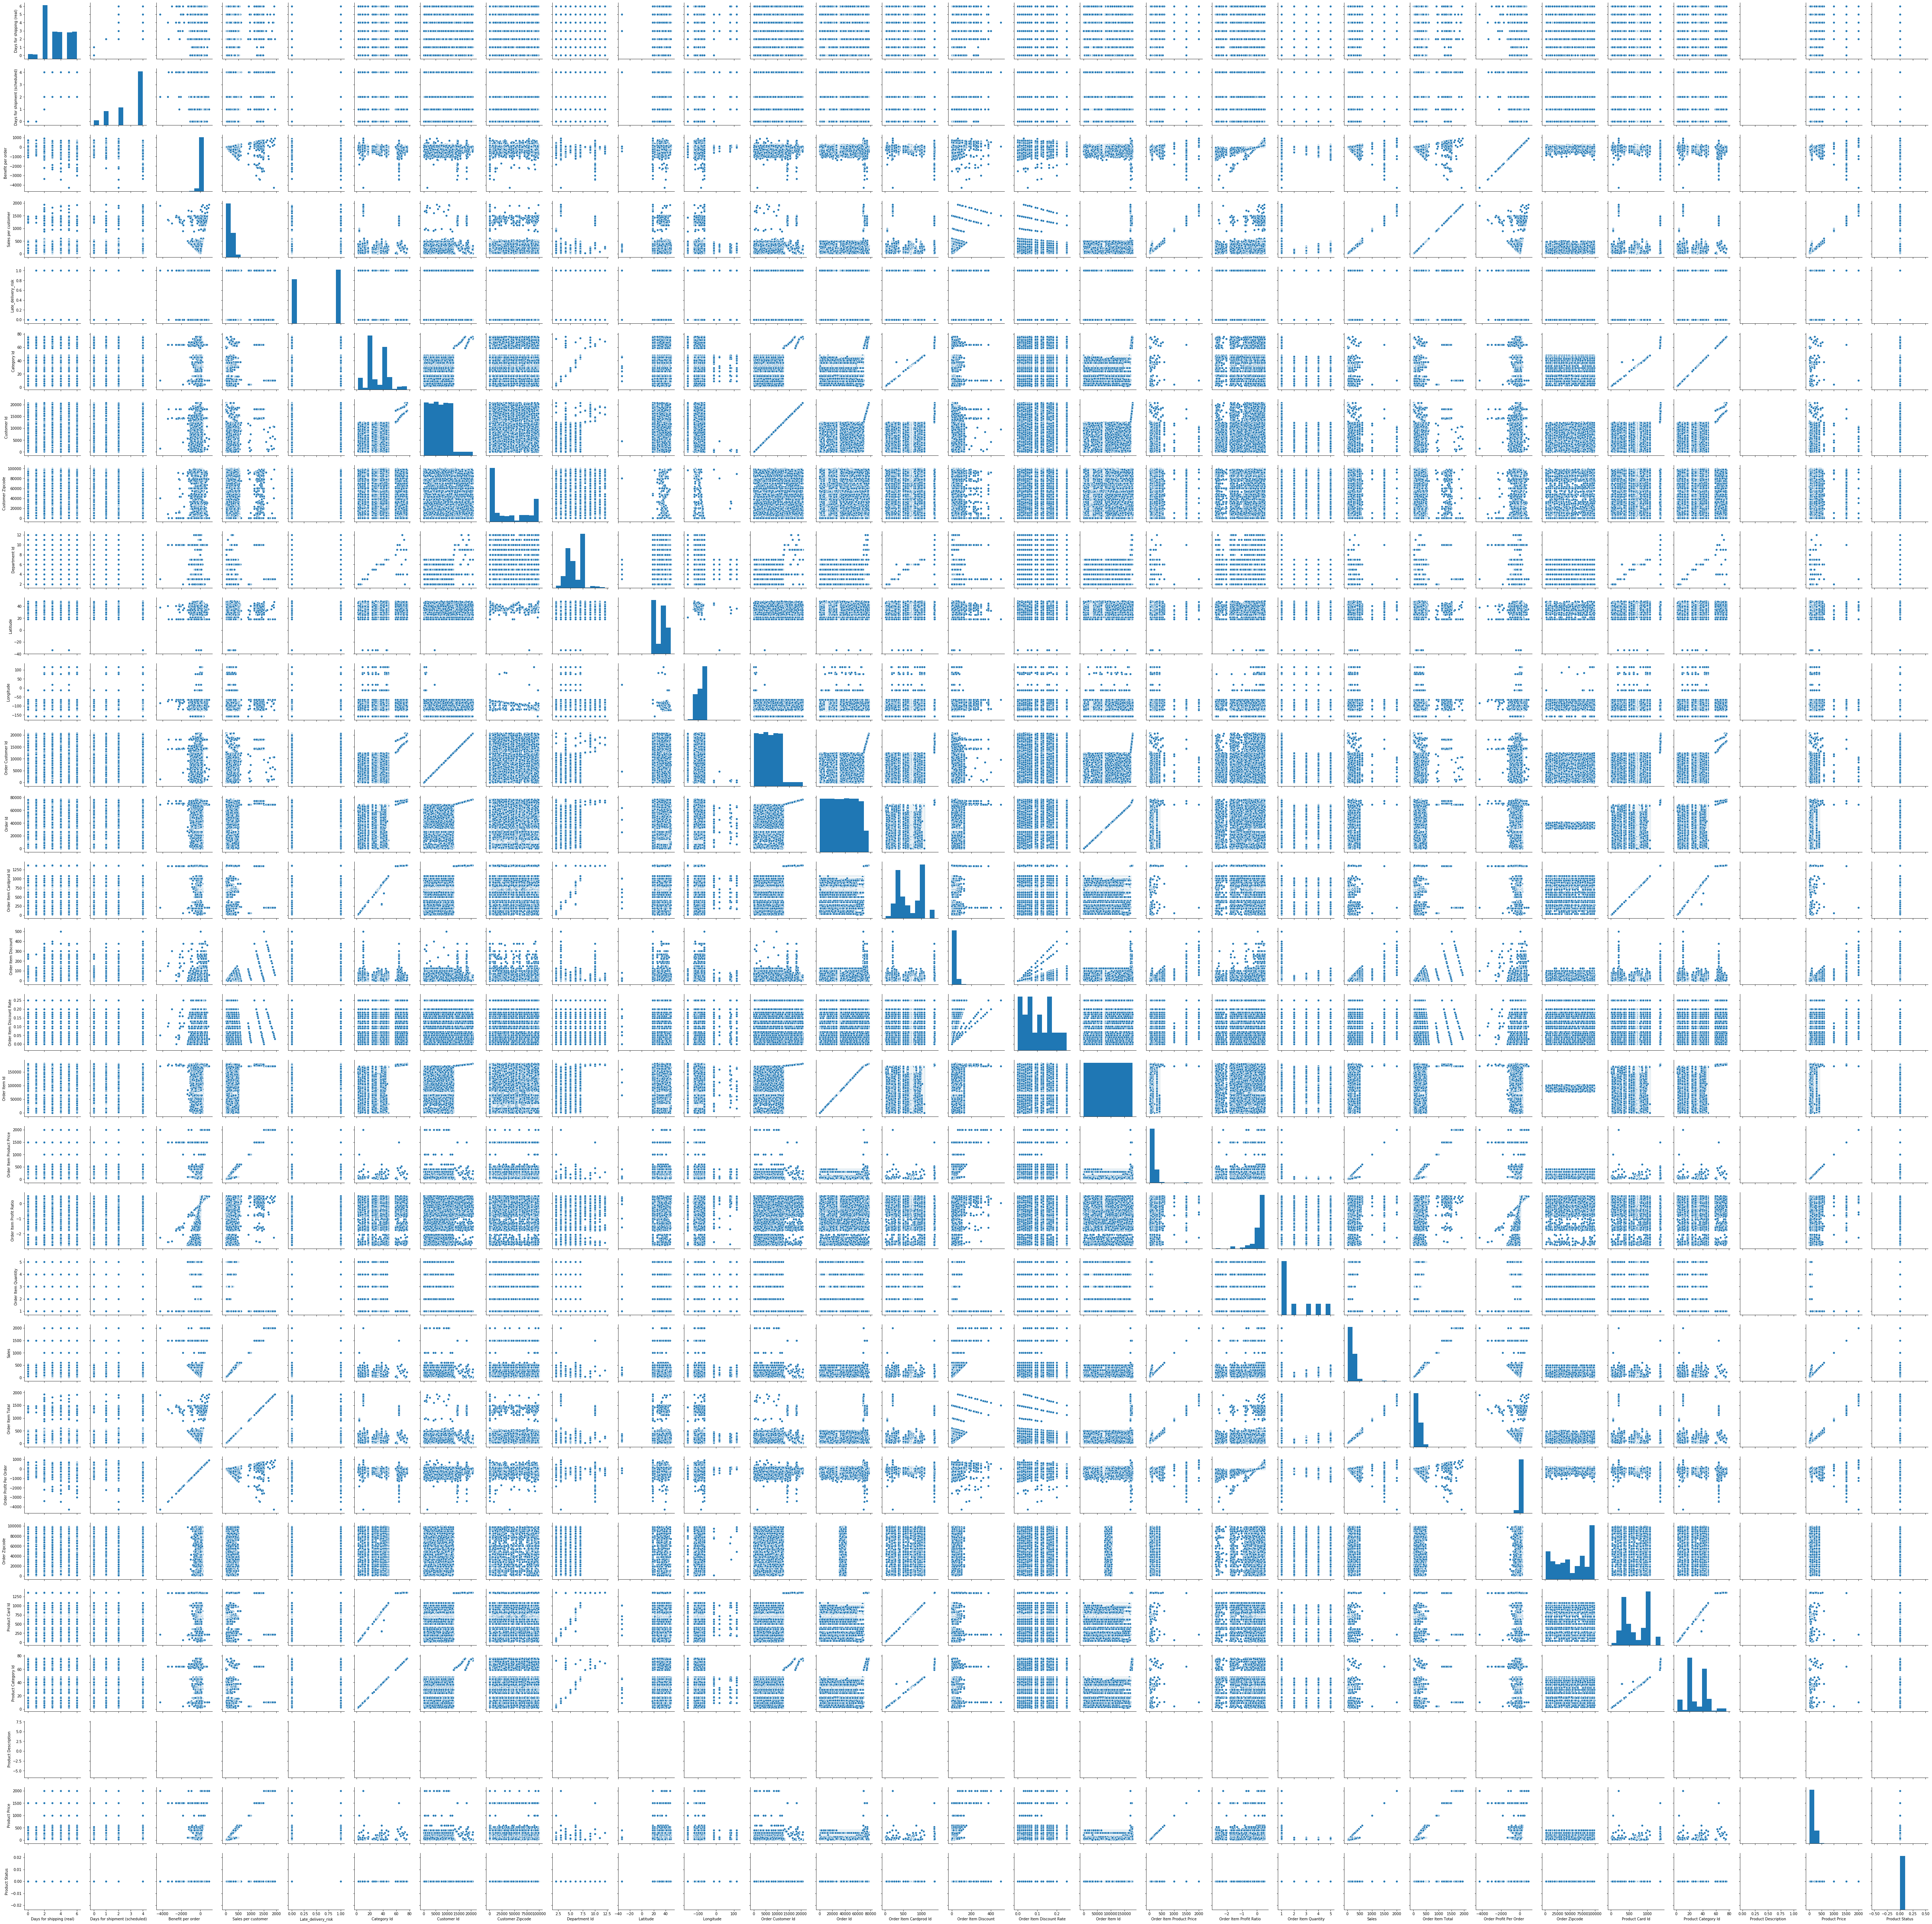

In [24]:
sns.pairplot(df)

Try a heat map to show correlated relationships

In [25]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

O:\Users\Joe\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
O:\Users\Joe\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
O:\Users\Joe\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [26]:
df.rename(columns = {'Order Status':'Order_Status','Shipping Mode':'Shipping_Mode','shipping date (DateOrders)':'Ship_Date', 'Category Id': 'Category_Id'}, inplace = True)

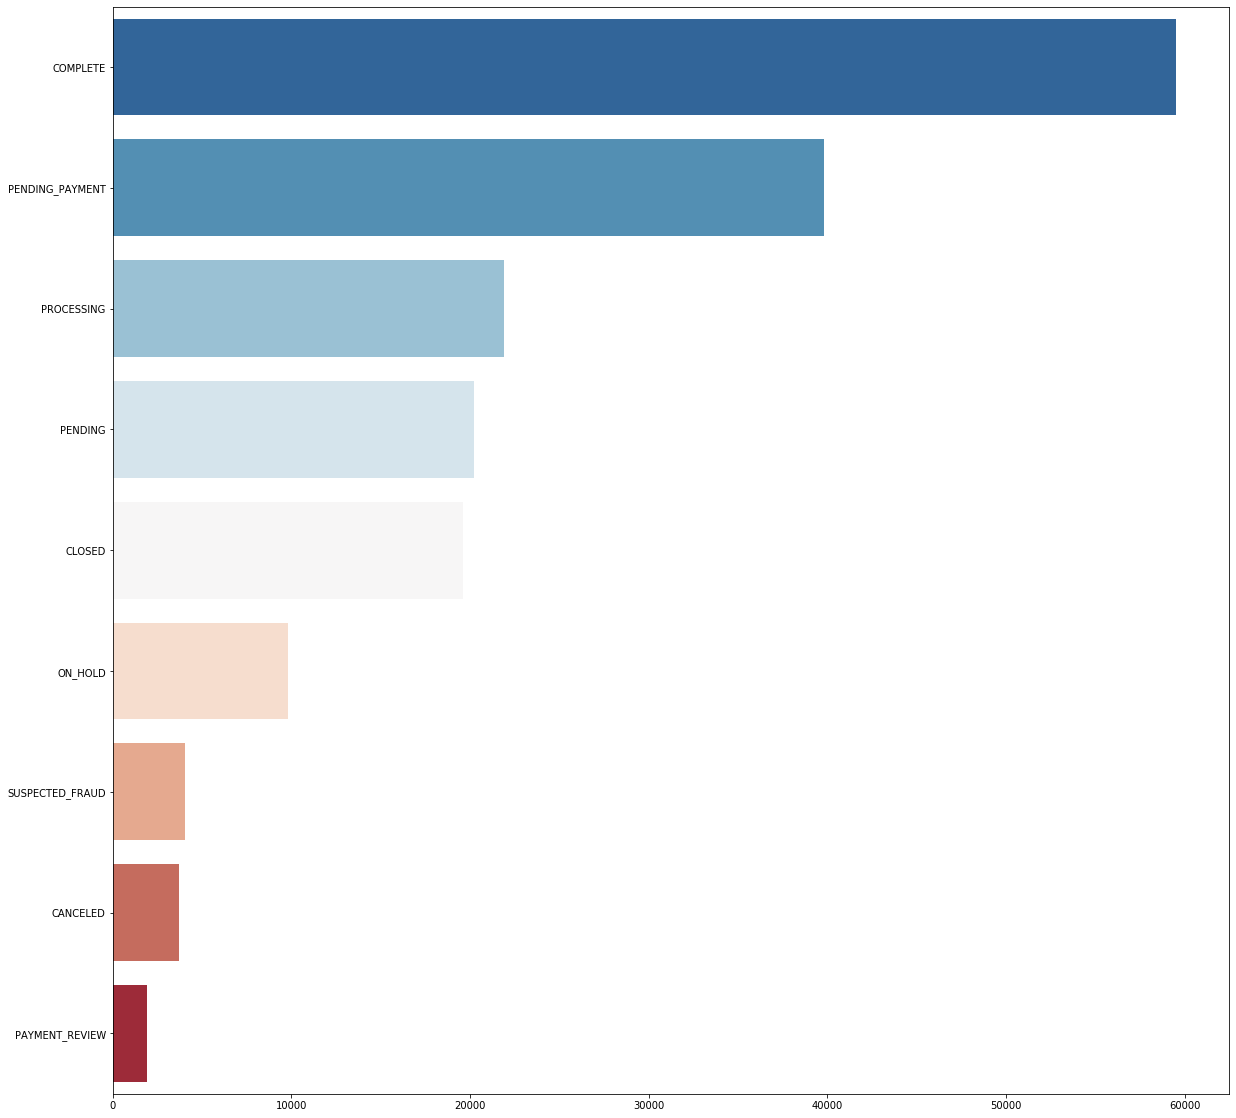

In [27]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(20, 20))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Order_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Order_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

In [69]:
df.rename(columns = {'Order Region':'Order_Region','Order State':'Order_State','Days for shipping (real)':'Actual_Ship_Days','Days for Shipment(scheduled)':'Scheduled_Ship_Days','Delivery Status':'Delivery_Status'}, inplace = True)

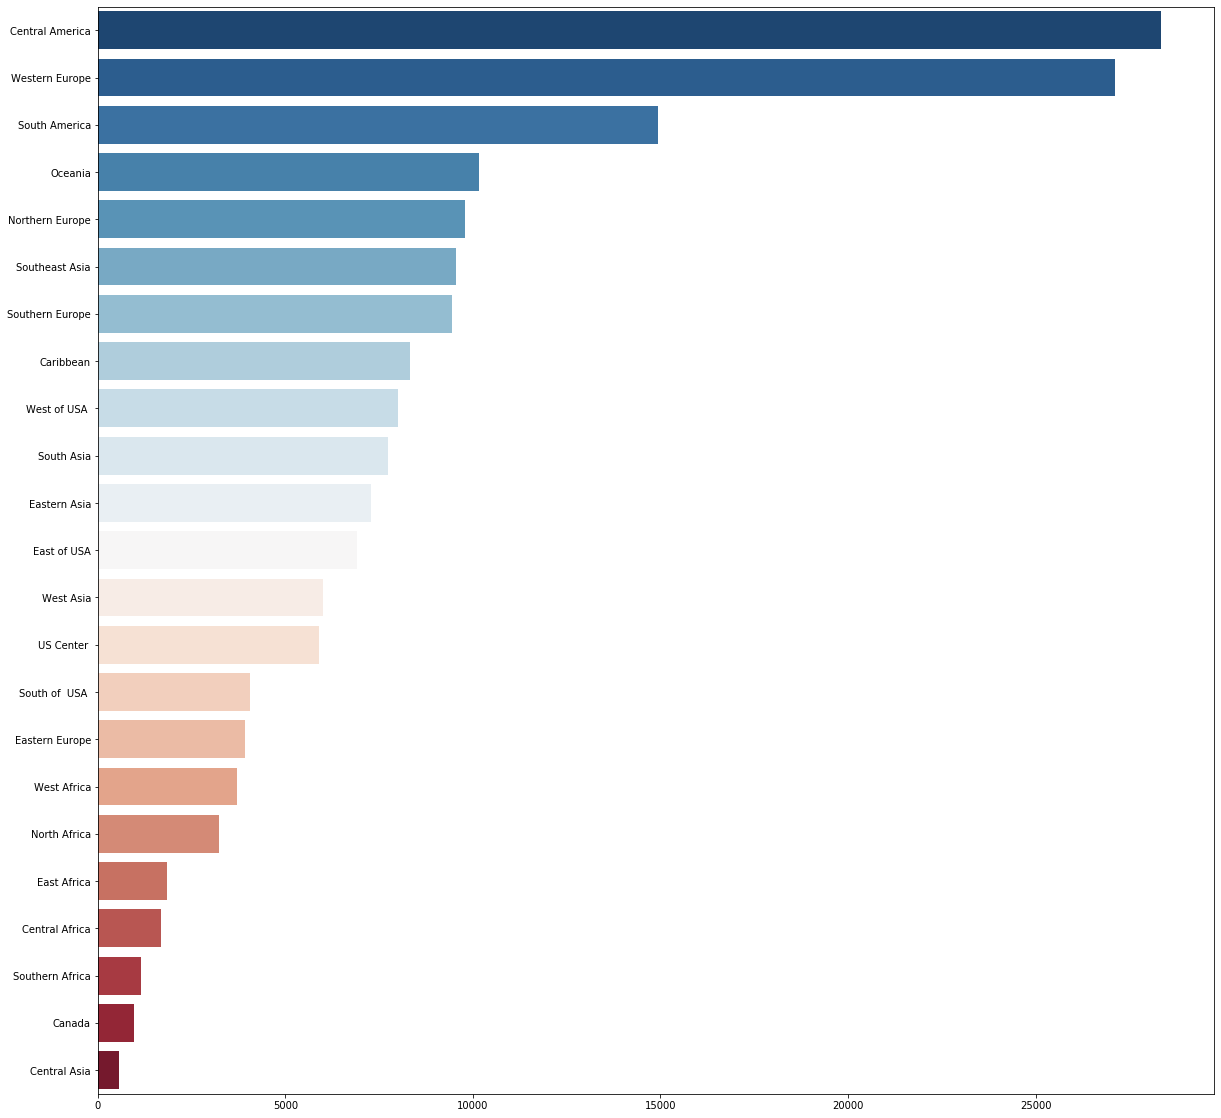

In [70]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(20, 20))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Order_Region.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Order_Region)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
is_central = df['Order_Region']=='Central America'
df_central = df[central]
is_weuro = df['Order_Region']=='Western Europe'
df_weuro = df[is_weruo]


O:\Users\Joe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
O:\Users\Joe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
O:\Users\Joe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)
O:\Users\Joe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


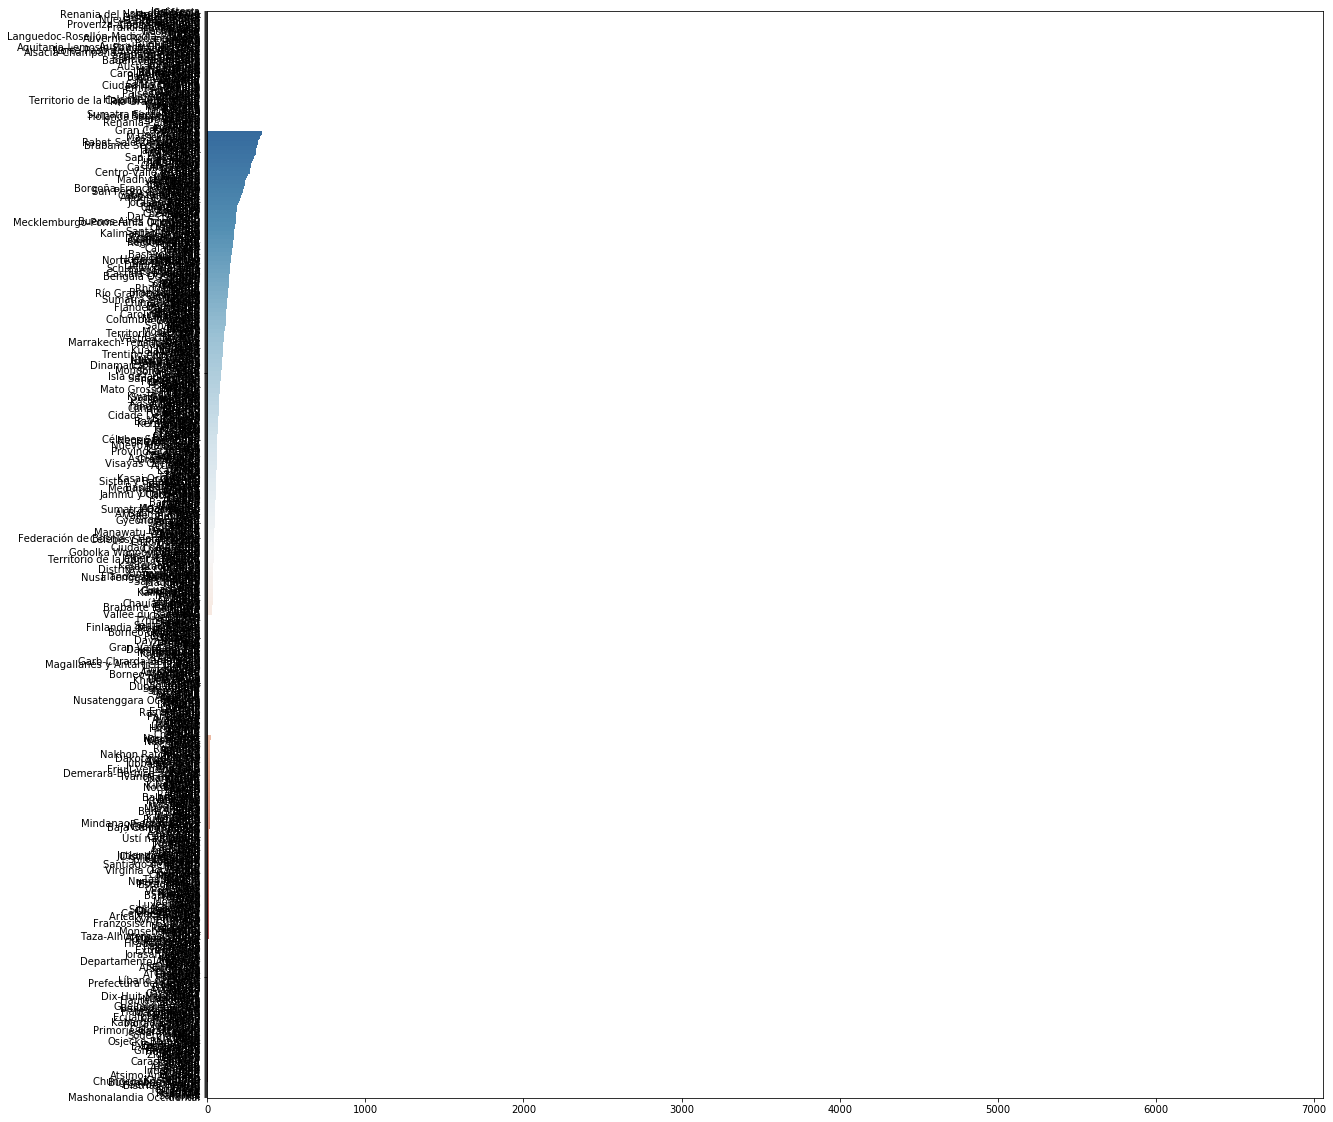

In [81]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(20, 20))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Order_State.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Order_State)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

That' s not very helpful.  State level has too many different entries without divy into smaller parcels.  Possible individual analysis of state delivery practices might present points of interest, or filter the states by Region should make it more manageable.  

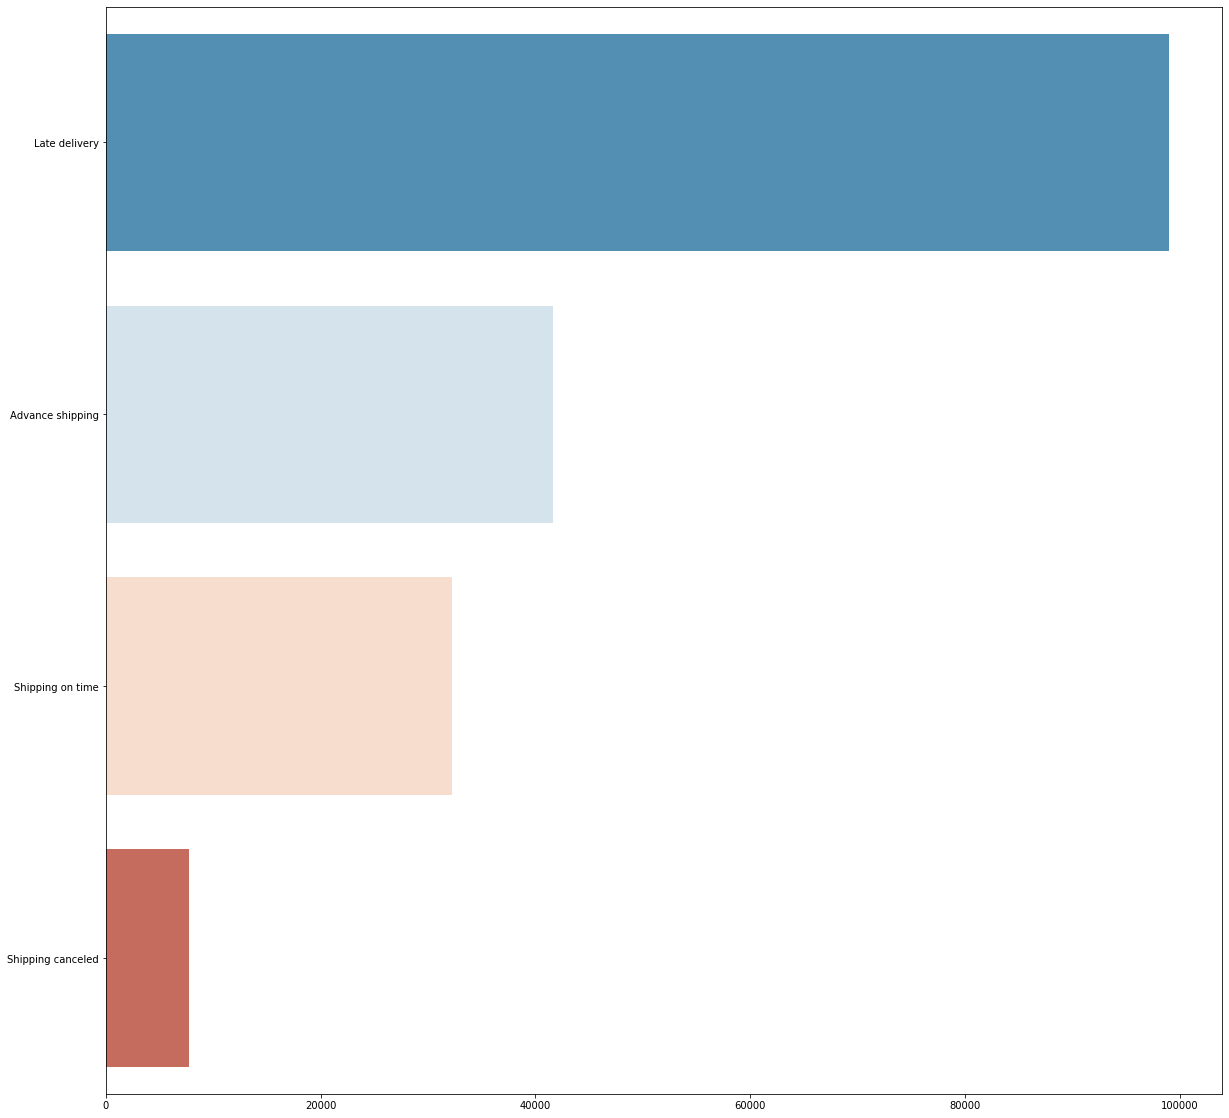

In [71]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(20, 20))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Delivery_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Delivery_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots( figsize=(10,10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df_usca['Delivery Status'].value_counts())
total = sum(x['Delivery Status'])
# Get the state names by calling list() on the x.index
names = list(x.index)
for i in range(len(names)):
    print(i, end = " ")
    print(names[i])
# Get the values by plugging x.state into the list() function
values = list(x['Delivery Status'])
for i in range(len(values)):
    print(i, end = " ")
    print("Percent of total Deliveries", round(((values[i]/total)*100),2))
    print(values[i])
# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('North and Central America Delivery Status')

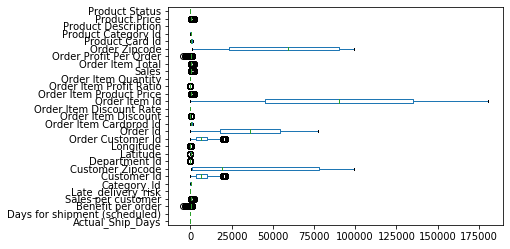

In [72]:
boxplot = df.boxplot(grid = False, vert = False, fontsize = 10)

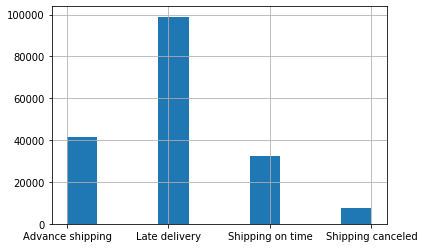

In [74]:
df['Delivery_Status'].hist()

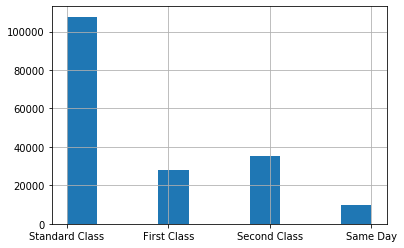

In [78]:
df['Shipping_Mode'].hist()

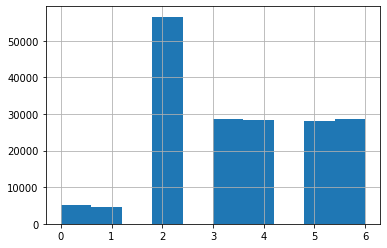

In [79]:
df['Actual_Ship_Days'].hist()

In [82]:
df.to_csv('BigMartData_output.csv')